# Bertrand Paradox

## Setup and auxiliary functions

In [23]:
import math
from random import random
import numpy as np
import matplotlib.pyplot as plt

In [189]:
# Radius of the circle
r = 1
# Origin of the circle fixed at (0, 0)
O = (0, 0)

sample_size = 100

In [65]:
def compute_distance(X, Y):
        return math.sqrt((X[0] - Y[0])**2 + (X[1] - Y[1])**2)

In [122]:
def draw_triangle(V):
        # First vertex of the triangle (V)
        x, y = V
        points = np.hstack([x, y])
        plt.plot(x, y, color='red', marker='x', label='First vertex of triangle')

        # Second vertex of the triangle, rotating the tangent to V by 60 deg (A)
        angle = np.deg2rad(120)
        x = V[0] * np.cos(angle) - (V[1] * np.sin(angle))
        y = V[0] * np.sin(angle) + (V[1] * np.cos(angle))
        A = (x, y)
        points = np.vstack([points, [x, y]])

        # Third vertex of the triangle, rotating the tangent to V by 120 deg (B)
        angle = np.deg2rad(240)
        x = V[0] * np.cos(angle) - (V[1] * np.sin(angle))
        y = V[0] * np.sin(angle) + (V[1] * np.cos(angle))
        B = (x, y)
        points = np.vstack([points, [x, y]])

        # Added in order to plot the last side
        points = np.vstack([points, [V[0], V[1]]])
        
        plt.plot(points[:, 0], points[:, 1], linewidth=3, color='red', label='Equilateral triangle')
        
        # Compute the size of the side
        global side
        side = compute_distance(A, B)

## First case

In [199]:
def first_case():
        plt.suptitle('First case:')
        ig, ax = plt.subplots(figsize=(5,5))
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.set_aspect('equal')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        circle = plt.Circle(O, r, fill=False)
        ax.add_artist(circle)
        
        # Pick random first vertex of the equilateral triangle
        angle = 2 * np.pi * random()
        V = x, y = r * np.cos(angle), r * np.sin(angle)
        draw_triangle(V)
        
        global side
        longer_chords = 0  
        for i in range(sample_size):
            angle = 2 * np.pi * random()
            M = x, y = r * np.cos(angle), r * np.sin(angle)
            plt.plot(x, y, color='black', marker='.')
            
            if compute_distance(V, M) > side:
                longer_chords += 1
                plt.plot([V[0], x], [V[1], y], color='blue')
            else:
                plt.plot([V[0], x], [V[1], y], color='gray')

        print('{0}/{1} = {2}'.format(longer_chords, sample_size, longer_chords/sample_size))

        
        plt.legend(loc='upper right')
        plt.show()

22/100 = 0.22


<Figure size 640x480 with 0 Axes>

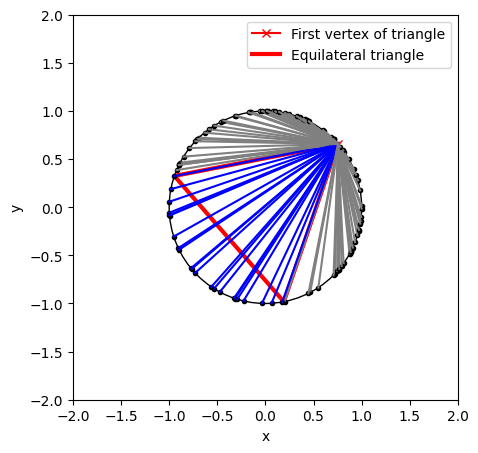

In [200]:
first_case()

## Second case

In [216]:
def second_case():
    plt.suptitle('Second case:')
    ig, ax = plt.subplots(figsize=(5,5))
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    circle = plt.Circle(O, r, fill=False)
    ax.add_artist(circle)

    # Pick random radius
    angle = 2 * np.pi * random()
    x, y = r * np.cos(angle), r * np.sin(angle)
    plt.plot([0, x], [0, y], color='black', linewidth=3, label='Radius')

    # Build a triangle that is oriented in a way that the opposite side of V is perpendicular on the radius
    perpendicular_angle = abs(angle - np.pi/2)
    P = x, y = r * np.cos(angle), r * np.sin(angle)
    draw_triangle(P)

    # Compute the middle of the radius
    A = middle_r_x, middle_r_y = r / 2 * np.cos(angle), r / 2 * np.sin(angle)
    plt.plot(middle_r_x, middle_r_y, color='green', marker='x', label='Middle of the radius')

    longer_chords = 0
    for i in range(sample_size):
        m = random() * r
        M = x, y = m * np.cos(angle), m * np.sin(angle)
        plt.plot(x, y, color='yellow', marker='.')

        # Build chord (x1, y1)->(x2, y2)
        length = math.sqrt(pow(r, 2) - pow(compute_distance(M, (0, 0)), 2))
        x1, y1 = x + length * np.cos(perpendicular_angle), y + length * np.sin(perpendicular_angle)
        x2, y2 = x - length * np.cos(perpendicular_angle), y - length * np.sin(perpendicular_angle)
        
        if compute_distance(A, (0, 0)) < compute_distance(M, (0, 0)):
            plt.plot([x1, x2], [y1, y2], color='gray')
        else:
            plt.plot([x1, x2], [y1, y2], color='blue')
            longer_chords += 1

    print('{0}/{1} = {2}'.format(longer_chords, sample_size, longer_chords / sample_size))

    plt.legend(loc='upper right')
    plt.show()

62/100 = 0.62


<Figure size 640x480 with 0 Axes>

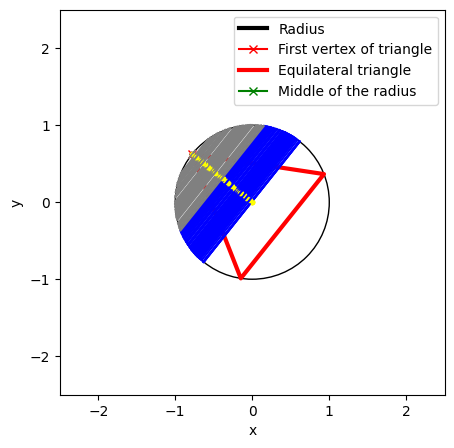

In [217]:
second_case()

## Third case

In [248]:
def third_case():
    fig.suptitle('Third case')
    ig, ax = plt.subplots(figsize=(5,5))
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    circle = plt.Circle(O, r, fill=False)
    ax.add_artist(circle)

    # Draw triangle
    angle = 2 * np.pi * random()
    P = x, y = r * np.cos(angle), r * np.sin(angle)
    draw_triangle(P)
    
    # Draw inscribed circle
    circle = plt.Circle((0, 0), r / 2, color='grey', fill=False)
    fig.add_artist(circle)

    longer_chords = 0
    for i in range(sample_size):
        angle = 2 * np.pi * random()
        rand_r = math.sqrt(random())
        M = x, y = rand_r * r * np.cos(angle), rand_r * r * np.sin(angle)
        
        if compute_distance(M, (0, 0)) <= r / 2:
            plt.plot(x, y, color='blue', marker='.')     
            longer_chords += 1
        else:
            plt.plot(x, y, color='gray', marker='.')   

    print('{0}/{1} = {2}'.format(longer_chords, sample_size, longer_chords / sample_size))

    plt.legend(loc='upper right')
    plt.show()

26/100 = 0.26


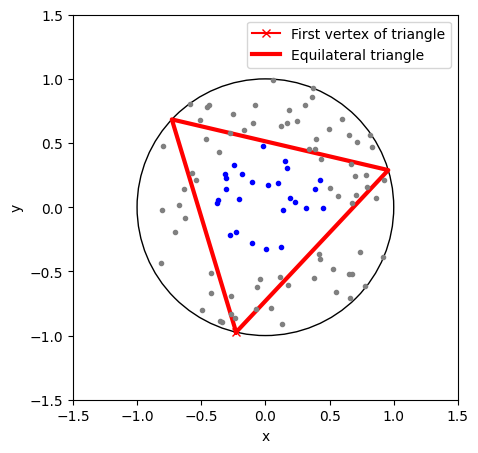

In [249]:
third_case()